In [1]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

C:\Users\Vikas\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Define paths to the training and testing data
train_data_dir = '../data/fruits-360/Training'
test_data_dir = '../data/fruits-360/Test'


def load_data(data_directory):
    images = []
    labels = []
    for sub_directory in os.listdir(data_directory): # iterating through each directory
        sub_directory_path = os.path.join(data_directory, sub_directory)
        # print(images_path)
        for image_fruit in os.listdir(sub_directory_path):
            image_path = os.path.join(sub_directory_path, image_fruit)
            # print(image_path)
            # print(sub_directory)
            img = load_img(image_path, target_size=(100, 100))
            img_array = img_to_array(img)
            img_array /= 255.0  # Normalize the pixel values

            # Append the image and its label to the lists
            images.append(img_array)
            labels.append(sub_directory)
    return np.array(images), np.array(labels)

In [3]:
x_train, y_train = load_data(train_data_dir)
x_test, y_test = load_data(test_data_dir)

In [4]:
y_train

array(['Apple Braeburn', 'Apple Braeburn', 'Apple Braeburn', ..., 'Dates',
       'Dates', 'Dates'], dtype='<U18')

In [5]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Assuming you have class labels as strings in y_train and y_test
# Convert them to integer labels using LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform on training data
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform on testing data (use the same encoder fitted on training data)
y_test_encoded = label_encoder.transform(y_test)

# Convert integer labels to one-hot encoding
num_classes = len(label_encoder.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)

In [6]:
# Reshape your input data if needed (adjust the shape based on your image dimensions)
X_train_flattened = x_train.reshape(len(x_train), 100 * 100 * 3)
X_test_flattened = x_test.reshape(len(x_test), 100 * 100 * 3)

In [7]:
y_train_one_hot.shape

(14046, 28)

In [57]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(28, input_shape=(100 * 100 * 3,), activation="softmax")
])

# Compile the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",  # Use categorical crossentropy for one-hot encoded labels
    metrics=["accuracy"]
)

# Train the model
model.fit(X_train_flattened, y_train_one_hot, epochs=5)



Epoch 1/5
439/439 [==============================] - 6s 12ms/step - loss: 2.1897 - accuracy: 0.8026
Epoch 2/5
439/439 [==============================] - 5s 12ms/step - loss: 0.5063 - accuracy: 0.9208
Epoch 3/5
439/439 [==============================] - 5s 12ms/step - loss: 0.5851 - accuracy: 0.9250
Epoch 4/5
439/439 [==============================] - 5s 12ms/step - loss: 0.2528 - accuracy: 0.9640
Epoch 5/5
439/439 [==============================] - 5s 12ms/step - loss: 0.3620 - accuracy: 0.9524


In [58]:
# Evaluate the model on the test set
model.evaluate(X_test_flattened, y_test_one_hot)

148/148 [==============================] - 1s 5ms/step - loss: 3.2429 - accuracy: 0.7950


[3.242910385131836, 0.7950297594070435]

In [59]:
y_predicted = model.predict(X_test_flattened)

148/148 [==============================] - 1s 5ms/step


In [60]:
np.argmax(y_predicted[2])

0

In [61]:
y_predicted_labels = [np.argmax(val) for val in y_predicted]
y_predicted_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [62]:
np.argmax(y_test_one_hot[725])

4

In [63]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test_encoded, predictions=y_predicted_labels)


<tf.Tensor: shape=(28, 28), dtype=int32, numpy=
array([[ 96,  59,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   9,   0,   0,   0,
          0,   0],
       [  0, 131,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  33,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0, 143,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 166,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  71,  94,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 103,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,  

Text(69.0, 0.5, 'Truth')

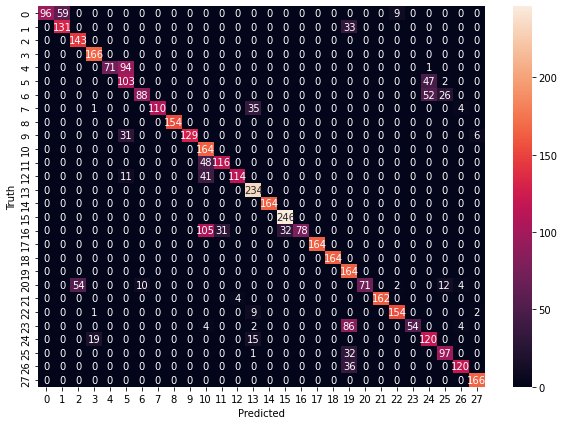

In [64]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [79]:
from tensorflow import keras

# Evaluate the model on the test set
model.evaluate(X_test_flattened, y_test_one_hot)


from tensorflow import keras

model = keras.Sequential([
    # keras.layers.Dense(128, input_shape=(100 * 100 * 3,), activation="relu"),  # Hidden layer
    # keras.layers.Dense(28, activation="softmax")  # Output layer with softmax activation for multiclass classification
    
    keras.layers.Dense(256, input_shape=(100 * 100 * 3,), activation="relu"),  # First hidden layer
    keras.layers.Dense(128, activation="relu"),  # Additional hidden layer
    keras.layers.Dense(56, activation="relu"),  # Additional hidden layer
    keras.layers.Dense(28, activation="softmax")  # Output layer with softmax activation for multiclass classification
])

# Compile the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model
model.fit(X_train_flattened, y_train_one_hot, epochs=10)


148/148 [==============================] - 1s 8ms/step - loss: 0.9492 - accuracy: 0.8449
Epoch 1/10
439/439 [==============================] - 65s 145ms/step - loss: 1.3158 - accuracy: 0.7072
Epoch 2/10
439/439 [==============================] - 63s 144ms/step - loss: 0.1610 - accuracy: 0.9517
Epoch 3/10
439/439 [==============================] - 63s 143ms/step - loss: 0.1336 - accuracy: 0.9598
Epoch 4/10
439/439 [==============================] - 63s 144ms/step - loss: 0.0385 - accuracy: 0.9875
Epoch 5/10
439/439 [==============================] - 63s 144ms/step - loss: 0.1388 - accuracy: 0.9611
Epoch 6/10
439/439 [==============================] - 64s 146ms/step - loss: 0.0183 - accuracy: 0.9947
Epoch 7/10
439/439 [==============================] - 64s 146ms/step - loss: 0.1577 - accuracy: 0.9537
Epoch 8/10
439/439 [==============================] - 65s 148ms/step - loss: 0.0578 - accuracy: 0.9811
Epoch 9/10
439/439 [==============================] - 65s 147ms/step - loss: 0.0917 - a

In [80]:
# Evaluate the model on the test set
model.evaluate(X_test_flattened, y_test_one_hot)

MemoryError: Unable to allocate 539. MiB for an array with shape (4708, 30000) and data type float32

148/148 [==============================] - 1s 5ms/step


Text(69.0, 0.5, 'Truth')

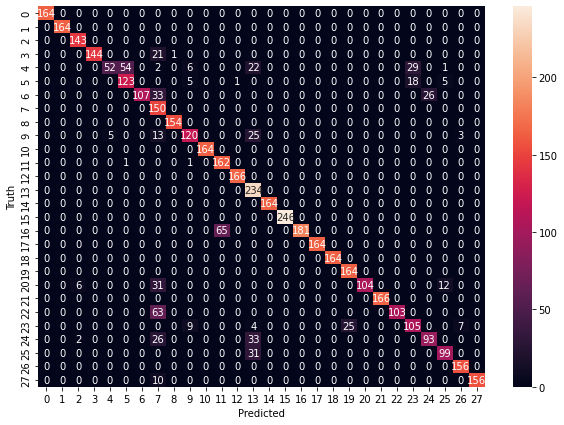

In [76]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(val) for val in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test_encoded, predictions=y_predicted_labels)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [10]:
import matplotlib.pyplot as plt